In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from time import time
df = pandas.read_csv("../data/bbtop15-lyrics-exploring-tokenized.csv")

#drop rows where the text is missing.
df = df.dropna(subset=['lyrics'])

#view the dataframe
df

,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree
0,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","\n\n\n""Whatll we get for 10 dollars?""\n""Every ...","[""''"", 'Whatll', 'we', 'get', 'for', '10', 'do...","['Whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'get', '10', 'dollars', 'every', 't..."
1,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,\n\n\nBust it\n\n\nThis heres a jam for all th...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l..."
2,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","\n\n\nWell excuse me, take a few minutes, to m...","['Well', 'excuse', 'me', ',', 'take', 'a', 'fe...","['Well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'take', 'minutes', 'mellow'..."
3,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","['You', 'can', 'chachacha', 'to', 'this', 'Mar...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'..."
4,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,\n\n\nI go to work like a doctor\nWhen I rock ...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['go', 'work', 'like', 'doctor', 'rock', 'mic'..."
5,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","['Yo', 'Wreckx-N-Effect', 'In', 'full', 'effec...","['Yo', 'WreckxNEffect', 'In', 'full', 'effect'...","['yo', 'wreckxneffect', 'in', 'full', 'effect'...","['yo', 'wreckxneffect', 'full', 'effect', 'wor..."
6,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...,"['Yo', '!', 'My', 'Lone', 'Mixer', 'You', 'rea...","['Yo', 'My', 'Lone', 'Mixer', 'You', 'ready', ...","['yo', 'my', 'lone', 'mixer', 'you', 'ready', ...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone..."
7,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,\n\n\nHave you ever met a girl that you tried ...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['have', 'you', 'ever', 'met', 'a', 'girl', 't...","['ever', 'met', 'girl', 'tried', 'date', 'year..."
8,8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...,\n\n\nYall ready for this\nRastafara Sonna Mad...,"['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['yall', 'ready', 'for', 'this', 'rastafara', ...","['yall', 'ready', 'rastafara', 'sonna', 'madda..."
9,9,Somebody For Me,Heavy D & The Boyz,Male,1989-11-04,1989,\n\nOh yeah..\n\nLove somebo-dy...\n\n(Al B. S...,\n\nOh yeah..\n\nLove somebo-dy...\n\n(Al B. S...,"['Oh', 'yeah..', 'Love', 'somebo-dy', '...', '...","['Oh', 'yeah', 'Love', 'somebody', 'Al', 'B', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ..."


In [3]:
####Adopted From: 
#Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

n_samples = 2317
n_topics = 6
n_top_words = 50
n_features = 1000

##This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

### LDA

In [6]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english'
                                )

#tf = tf_vectorizer.fit_transform(df.lyrics_clean)

Extracting tf features for LDA...


In [44]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=n_samples,
                                random_state=0)
#fit the model
lda.fit(tf)

Fitting LDA models with tf features, n_samples=2317 and n_topics=6...


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=80.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_jobs=1, n_topics=6, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=2317, verbose=0)

In [45]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:

Topic #0:
oh ya yeah uh baby hey make lets come wanna let girl yo party say right ooh shake ay light bounce body cause ah just ready dance wit boom rock watch hands huh hit ride gon shawty green roll booty drop everybody cmon boy jump hot low stop club freak

Topic #1:
die ghetto alive life whoa catch long day dirt damn stop shit felt god bout oh wont survive heaven place pain time family alright won cause believe live black say tears lord dead thug fore strong projects lonely livin wonder died fall star things em block don pray holla new

Topic #2:
la da dem di mi man somebody gimme told king fi come girls bout girl oooh keys say tell wine country high shots al mama look yeah love fame yo lo want good run way care talk pretty life diamond hes people hear nah music don real write time make

Topic #3:
love just baby aint girl wanna cause want time right way make let yeah good say need feel said tell youre thats come gotta life ill man eyes night real really things

### LDA 2000 present

In [26]:
df_2000s = df[df['year'] >= 2000]
df_2000s 

,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree
937,1266,N 2 Gether Now,Limp Bizkit Featuring Method Man,Male,2000-01-01,2000,\n\n[Produced by DJ Premier]\n\nDj....Premier....,\n\n\n\nDj....Premier...\n\n\nUh uh uh\nWho co...,"['Dj', '...', '.Premier', '...', 'Uh', 'uh', '...","['Dj', 'Premier', 'Uh', 'uh', 'uh', 'Who', 'co...","['dj', 'premier', 'uh', 'uh', 'uh', 'who', 'co...","['dj', 'premier', 'uh', 'uh', 'uh', 'could', '..."
938,1271,Best Friend,Puff Daddy Featuring Mario Winans & Hezekiah W...,Male,2000-02-12,2000,\n\n[Puffy] (Mario)\nI've seen a lot of things...,\n\n (Mario)\nIve seen a lot of things in my l...,"['(', 'Mario', ')', 'Ive', 'seen', 'a', 'lot',...","['Mario', 'Ive', 'seen', 'a', 'lot', 'of', 'th...","['mario', 'ive', 'seen', 'a', 'lot', 'of', 'th...","['mario', 'ive', 'seen', 'lot', 'things', 'lif..."
939,1272,Freakin' It,Will Smith,Male,2000-02-12,2000,"\n\nUh, uh\nI'm bout to freak this\nHa, ha, ha...","\n\nUh, uh\nIm bout to freak this\nHa, ha, ha,...","['Uh', ',', 'uh', 'Im', 'bout', 'to', 'freak',...","['Uh', 'uh', 'Im', 'bout', 'to', 'freak', 'thi...","['uh', 'uh', 'im', 'bout', 'to', 'freak', 'thi...","['uh', 'uh', 'im', 'bout', 'freak', 'ha', 'ha'..."
940,1273,The Express,Talib Kweli & Hi-Tek,Male,2000-02-12,2000,"\n\n[Talib Kweli]\n""There comes a time-""\nHi-T...","\n\n\n""There comes a time-""\nHi-Tek, who we ro...","[""''"", 'There', 'comes', 'a', 'time-', ""''"", '...","['There', 'comes', 'a', 'time', 'HiTek', 'who'...","['there', 'comes', 'a', 'time', 'hitek', 'who'...","['comes', 'time', 'hitek', 'rockin', 'wit', 'e..."
941,1274,That's What I'm Looking For/What'Chu Like,Da Brat,Female,2000-02-12,2000,"\n\nBrat\nHey JD, why you be saying oh, oh\nIs...","\n\nBrat\nHey JD, why you be saying oh, oh\nIs...","['Brat', 'Hey', 'JD', ',', 'why', 'you', 'be',...","['Brat', 'Hey', 'JD', 'why', 'you', 'be', 'say...","['brat', 'hey', 'jd', 'why', 'you', 'be', 'say...","['brat', 'hey', 'jd', 'saying', 'oh', 'oh', 'l..."
942,1275,Got Your Money,Ol' Dirty Bastard Featuring Kelis,Female,2000-02-19,2000,\n\n[Intro: Ol' Dirty Bastard]\nI dedicate thi...,\n\n\nI dedicate this to all the pretty girls\...,"['I', 'dedicate', 'this', 'to', 'all', 'the', ...","['I', 'dedicate', 'this', 'to', 'all', 'the', ...","['i', 'dedicate', 'this', 'to', 'all', 'the', ...","['dedicate', 'pretty', 'girls', 'pretty', 'gir..."
943,1277,Whistle While You Twurk,Ying Yang Twins,Male,2000-02-26,2000,\n\n{Chorus}\n[Kaine]\nEverybody in the club k...,\n\n{Chorus}\n\nEverybody in the club know waz...,"['{', 'Chorus', '}', 'Everybody', 'in', 'the',...","['Chorus', 'Everybody', 'in', 'the', 'club', '...","['chorus', 'everybody', 'in', 'the', 'club', '...","['chorus', 'everybody', 'club', 'know', 'waz',..."
944,1278,Party Up (Up In Here),DMX,Male,2000-02-26,2000,\n\n[Hook: DMX]\nY'all gon' make me lose my mi...,\n\n\nYall gon make me lose my mind\nUp in her...,"['Yall', 'gon', 'make', 'me', 'lose', 'my', 'm...","['Yall', 'gon', 'make', 'me', 'lose', 'my', 'm...","['yall', 'gon', 'make', 'me', 'lose', 'my', 'm...","['yall', 'gon', 'make', 'lose', 'mind', 'yall'..."
945,1280,Whoa!,Black Rob,Male,2000-02-26,2000,\n\n[Intro]\nI'm getting ready to put y'all up...,\n\n\nIm getting ready to put yall up on somet...,"['Im', 'getting', 'ready', 'to', 'put', 'yall'...","['Im', 'getting', 'ready', 'to', 'put', 'yall'...","['im', 'getting', 'ready', 'to', 'put', 'yall'...","['im', 'getting', 'ready', 'put', 'yall', 'som..."
946,1281,The 6th Sense,Common,Male,2000-02-26,2000,\n\n[Intro]\nThe revolution will not be televi...,\n\n\nThe revolution will not be televised\nTh...,"['The', 'revolution', 'will', 'not', 'be', 'te...","['The', 'revolution', 'will', 'not', 'be', 'te...","['the', 'revolution', 'will', 'not', 'be', 'te...","['revolution', 'televised', 'revolution', 'yea..."


In [8]:
tf_2000s = tf_vectorizer.fit_transform(df_2000s.lyrics_clean)

In [18]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (1380, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda_2000s = LatentDirichletAllocation(n_topics=5, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=1380,
                                random_state=0)
#fit the model
lda_2000s.fit(tf_2000s)

Fitting LDA models with tf features, n_samples=1380 and n_topics=6...


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=80.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_jobs=1, n_topics=5, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1380, verbose=0)

In [31]:
print("\nTopics in LDA model:")
tf_feature_names_2000s = tf_vectorizer.get_feature_names()
print_top_words(lda_2000s, tf_feature_names_2000s, n_top_words)


Topics in LDA model:

Topic #0:
nigga aint niggas shit dont fuck just em cause gon yall bitch man gotta thats new time tell real make right say yeah money let come want hood boy day hit bout need big wanna hold hard fuckin think stay ill high game bitches imma ya gettin did yo life

Topic #1:
bitch nigga money yeah fuck ass dont thats bitches just hoes niggas young shit aint bad pussy look dope watch ooh black white cause dick big ball love fly ho club say getting aye need man make want think lookin fresh em cash clean diamonds damn hit rich don chick

Topic #2:
ya da wit hey yo make ay shake let low uh bounce drop walk hit man ass club girl dance em dont boy girls wanna hands watch bout shawty pop booty hot come lil right work baby ride floor aint rock money round beat whats throw break head uhh lean

Topic #3:
baby oh girl yeah dont just wanna love want right make cause aint say let lets time need way come good tell body said ya night thats really youre gotta ill mind look uh little

In [30]:
topic_dist_2000s = lda_2000s.transform(tf_2000s)
topic_dist_2000s

array([[  7.39367762e-01,   1.03494160e-03,   6.33400208e-02,
          1.03650976e-03,   1.95220766e-01],
       [  1.06850031e-03,   1.05832710e-03,   3.37994820e-02,
          4.50000994e-03,   9.59573681e-01],
       [  1.38882901e-01,   3.78020740e-01,   1.18857662e-01,
          3.63559107e-01,   6.79589733e-04],
       ..., 
       [  7.69058523e-02,   1.06563480e-03,   1.06176682e-03,
          8.19642722e-01,   1.01324024e-01],
       [  3.03584764e-01,   1.18579288e-03,   1.21756971e-03,
          2.32000108e-01,   4.62011766e-01],
       [  9.93408417e-01,   1.64123702e-03,   1.64157377e-03,
          1.65656131e-03,   1.65221138e-03]])

In [29]:
topic_dist_df_2000s = pandas.DataFrame(topic_dist_2000s)
df_2000s_w_topics = topic_dist_df_2000s.join(df_2000s)
df_2000s_w_topics

,0,1,2,3,4,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree
0,0.739368,0.001035,0.063340,0.001037,0.195221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001069,0.001058,0.033799,0.004500,0.959574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.138883,0.378021,0.118858,0.363559,0.000680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.777296,0.001059,0.136359,0.075526,0.009761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.221030,0.377152,0.097029,0.244335,0.060453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.095205,0.280183,0.080346,0.543123,0.001142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.057714,0.347908,0.476638,0.047364,0.070376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.950905,0.000708,0.046957,0.000715,0.000715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.996455,0.000895,0.000887,0.000883,0.000880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.596003,0.001574,0.001573,0.001584,0.399265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_2000s_w_topics['word_count'] = df_2000s_w_topics['lyrics_clean'].apply(lambda x: len(str(x).split()))


In [23]:
topic_columns = range(0,5)

col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_2000s_w_topics[col] = df_2000s_w_topics[num] * df_2000s_w_topics['word_count']
    


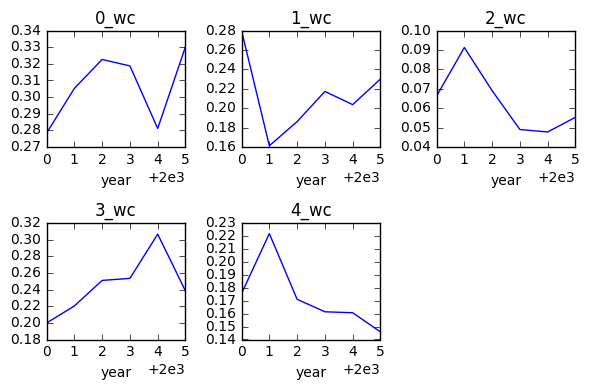

In [24]:
grouped_year_2000s = df_2000s_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year_2000s[e].sum()/grouped_year_2000s['word_count'].sum()).plot(kind='line', title=e)
    
fig3.tight_layout()
plt.show()

### Non-negative Matrix Factorization 

In [29]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=20, max_features=n_features,
                                   stop_words='english')

In [30]:
tfidf = tfidf_vectorizer.fit_transform(df.lyrics_clean)

In [31]:
# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d ..."
      % (n_samples))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

Fitting the NMF model with tf-idf features, n_samples=2317 ...
done in 0.703s.


In [32]:
print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model:

Topic #0:
love baby girl know want dont just let got good need youre wanna tell girls right aint im body way shes say things feel make yeah night heart gotta said long ill world time crazy loving sex bad thing really thats lovin lady forever tryna away leave shawty kiss gonna

Topic #1:
nigga niggas bitch fuck shit money bitches ass got yall aint hoes pussy dont fuckin dick gon hood know like im real fucking ho em club thats rich yeah bad bout young hit motherfucker lil wit big stay fucked dog boy pull tryna motherfuckin imma smoke look want die new

Topic #2:
im like got cause dont just know yo ya aint man em time yeah make come thats say let youre right ill way wanna gotta shit life think yall black gonna said feel need want new stop hit tell real rock play good day wit check little hey better chorus

Topic #3:
oh uh yeah ay wanna girl lets huh ooh want shawty ah know ha hair baby got make body hey look cmon come feeling tell right gon long ya like say party ni

### Document by Topic Distribution
One thing we may want to do with the output is find the most representative texts for each topic. A simple way to do this (but not memory efficient), is to merge the topic distribution back into the Pandas dataframe.
First get the topic distribution array.

In [56]:
topic_dist = lda.transform(tf)
topic_dist

array([[  7.90612778e-02,   1.63544092e-03,   1.62885464e-03,
          4.88227185e-01,   7.91111789e-02,   3.50336063e-01],
       [  9.21061733e-02,   7.65653918e-04,   7.63362090e-04,
          5.53934796e-01,   3.51663937e-01,   7.66077554e-04],
       [  1.24090860e-03,   1.23048842e-03,   1.23279757e-03,
          1.80818449e-01,   8.14240947e-01,   1.23640946e-03],
       ..., 
       [  7.98747695e-04,   8.00398571e-04,   7.95077459e-04,
          9.77384091e-01,   7.97535985e-04,   1.94241493e-02],
       [  9.47235011e-04,   3.87965675e-01,   9.41544824e-04,
          6.08257561e-01,   9.42183416e-04,   9.45800476e-04],
       [  1.22012120e-03,   1.09484094e-01,   1.21367023e-03,
          1.22262862e-03,   1.22106200e-03,   8.85638424e-01]])

In [47]:
topic_dist_df = pandas.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df)
df_w_topics

,0,1,2,3,4,5,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree
0,0.079061,0.001635,0.001629,0.488227,0.079111,0.350336,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","\n\n\n""Whatll we get for 10 dollars?""\n""Every ...","[""''"", 'Whatll', 'we', 'get', 'for', '10', 'do...","['Whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'get', '10', 'dollars', 'every', 't..."
1,0.092106,0.000766,0.000763,0.553935,0.351664,0.000766,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,\n\n\nBust it\n\n\nThis heres a jam for all th...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l..."
2,0.001241,0.001230,0.001233,0.180818,0.814241,0.001236,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","\n\n\nWell excuse me, take a few minutes, to m...","['Well', 'excuse', 'me', ',', 'take', 'a', 'fe...","['Well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'take', 'minutes', 'mellow'..."
3,0.078964,0.001410,0.001407,0.389542,0.527268,0.001409,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","['You', 'can', 'chachacha', 'to', 'this', 'Mar...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'..."
4,0.000791,0.000786,0.000786,0.059736,0.937110,0.000791,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,\n\n\nI go to work like a doctor\nWhen I rock ...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['go', 'work', 'like', 'doctor', 'rock', 'mic'..."
5,0.034977,0.001417,0.001424,0.341210,0.619551,0.001421,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","['Yo', 'Wreckx-N-Effect', 'In', 'full', 'effec...","['Yo', 'WreckxNEffect', 'In', 'full', 'effect'...","['yo', 'wreckxneffect', 'in', 'full', 'effect'...","['yo', 'wreckxneffect', 'full', 'effect', 'wor..."
6,0.004433,0.004397,0.004396,0.004399,0.977961,0.004414,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...,"['Yo', '!', 'My', 'Lone', 'Mixer', 'You', 'rea...","['Yo', 'My', 'Lone', 'Mixer', 'You', 'ready', ...","['yo', 'my', 'lone', 'mixer', 'you', 'ready', ...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone..."
7,0.041214,0.000780,0.008414,0.781027,0.167784,0.000781,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,\n\n\nHave you ever met a girl that you tried ...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['have', 'you', 'ever', 'met', 'a', 'girl', 't...","['ever', 'met', 'girl', 'tried', 'date', 'year..."
8,0.000870,0.000861,0.000860,0.000865,0.995681,0.000863,8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...,\n\n\nYall ready for this\nRastafara Sonna Mad...,"['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['yall', 'ready', 'for', 'this', 'rastafara', ...","['yall', 'ready', 'rastafara', 'sonna', 'madda..."
9,0.061058,0.001354,0.095345,0.422463,0.418427,0.001352,9,Somebody For Me,Heavy D & The Boyz,Male,19

Now we can sort the dataframe for the topic of interest, and view the top documents for the topics. Below we sort the documents first by Topic 0 (looking at the top words for this topic I think it's about family, health, and domestic activities), and next by Topic 1 (again looking at the top words I think this topic is about children playing outside in nature). These topics may be a family/nature split?
Look at the titles for the two different topics. Look at the gender of the author. Hypotheses?

### Sort by party topic

In [45]:
print(df_w_topics[['track','artist', 'artist_gender', 0]].sort_values(by=[0], ascending=False))

                             track  \
2304                    Greenlight   
354             Whoot, There It Is   
1350                  Lose Control   
1361                 Pon de Replay   
2126                    Trampoline   
2121                      Watch Me   
692   Space Jam (From "Space Jam")   
1597                         Krazy   
1631                 Boom Boom Pow   
1509       Crank That (Soulja Boy)   
1521                    Wadsyaname   
1565                     Get Silly   
1246                         Hotel   
1399                 Ms. New Booty   
872                    Be Faithful   
632   C'Mon N' Ride It (The Train)   
48                 Dancin' Machine   
1341                          Toma   
416                 Come Baby Come   
1448          Chicken Noodle Soup.   
280                    Rump Shaker   
994            Shake It Like A Dog   
1582                          Donk   
1528                           Low   
1277                 Get No Better   
1590        

## Sort by sex/money topic 

In [44]:
print(df_w_topics[['track','artist', 'artist_gender', 5]].sort_values(by=[5], ascending=False))

                                  track  \
2026                      Move That Doh   
1316                     What U Gon' Do   
1574                         Lookin Boy   
2256                          Champions   
620                           Get Money   
1652                       Plenty Money   
2220                      March Madness   
1926                            Bugatti   
2160                        Where Ya At   
1855                       Stay Schemin   
1881                       I Don't Like   
2293                           No Heart   
1626              Make Tha Trap Say Aye   
1930                Karate Chop (Remix)   
1889                          Go Get It   
2065                                 KK   
2214                     Look At My Dab   
1483                Know What I'm Doin'   
2023                         Lookin Ass   
1912                          Love Sosa   
1957                      Feds Watching   
1327                    U Don't Know Me   
2142       

## Sort by Love topic 

In [46]:
print(df_w_topics[['track','artist', 'artist_gender', 3]].sort_values(by=[3], ascending=False))

                                         track  \
1330                               Mockingbird   
202                               Poor Georgie   
1771                               Coming Home   
839                          Whatcha Wanna Do?   
919                                Satisfy You   
1154                              Luv U Better   
1804                                  Far Away   
2216                              Hello Friday   
2117                             Now & Forever   
1841                                 Take Care   
1745                        Loving You No More   
2127                                Good Lovin   
1794                               How To Love   
2164                             Hotline Bling   
1532                                I Want You   
345                              Lots Of Lovin   
1291                                  My Place   
412                           Think (About It)   
1844                                    Mirror   


### Sort by Life/religion topic

In [47]:
print(df_w_topics[['track','artist', 'artist_gender', 1]].sort_values(by=[1], ascending=False))

                                       track  \
2312                         Ville Mentality   
2310                         She's Mine Pt.1   
768          I Wonder If Heaven Got A Ghetto   
282                    Lonely Monday Morning   
642                           Tha Crossroads   
98                                The Ghetto   
945                                    Whoa!   
2315                        She's Mine Pt. 2   
1060                         U Know U Ghetto   
1851                   No Church In The Wild   
2211                            Xanny Family   
569                            So Many Tears   
799                       I Got The Hook Up!   
1962                                  Oceans   
1171                           Thugz Mansion   
2124                                   Bills   
565                  Survival Of The Fittest   
1061                             My Projects   
2135                      Go Hard Or Go Home   
2109                                  Le

### Prevalence over time

In [48]:
df_w_topics['word_count'] = df_w_topics['lyrics_clean'].apply(lambda x: len(str(x).split()))
df_w_topics['word_count']

0        342
1        621
2        411
3        420
4        695
5        361
6        150
7        663
8        623
9        339
10       538
11       634
12       361
13       645
14       695
15       645
16       510
17       400
18       713
19       649
20       673
21       935
22       637
23       705
24       594
25       431
26       555
27       702
28       687
29       635
        ... 
2287     794
2288     374
2289     515
2290     574
2291     458
2292     664
2293     598
2294     963
2295     621
2296     779
2297     747
2298     500
2299     484
2300     678
2301    1189
2302     414
2303     370
2304     690
2305     495
2306     795
2307     520
2308     576
2309     981
2310     330
2311     177
2312     337
2313    1466
2314     547
2315     562
2316     329
Name: word_count, dtype: int64

In [49]:
df_w_topics['0_wc'] = df_w_topics[0] * df_w_topics['word_count']
df_w_topics['0_wc']

0        27.038957
1        57.197934
2         0.510013
3        33.165053
4         0.550006
5        12.626578
6         0.664981
7        27.324556
8         0.541840
9        20.698778
10        0.621553
11        0.504470
12       43.730935
13       84.741991
14        0.745754
15       12.720554
16        0.521968
17       42.640658
18        0.495666
19        0.652509
20       26.459551
21       81.713541
22        0.631803
23      133.251524
24        0.650526
25      236.396923
26        0.570699
27       65.803737
28       32.939747
29        0.640424
           ...    
2287     51.439331
2288    224.736711
2289     52.557300
2290      0.633002
2291      0.436487
2292      0.571532
2293      0.483732
2294      0.649875
2295    223.938045
2296      0.568282
2297      0.583164
2298      0.536221
2299     60.160118
2300    117.772684
2301    227.183709
2302      0.652050
2303      0.606013
2304    688.092281
2305     31.071415
2306      0.576651
2307      0.452003
2308      0.

In [50]:
topic_columns = range(0,6)


In [51]:
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_w_topics[col] = df_w_topics[num] * df_w_topics['word_count']
    
df_w_topics

,0,1,2,3,4,5,track_id,track,artist,artist_gender,...,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
0,0.079061,0.001635,0.001629,0.488227,0.079111,0.350336,0,Me So Horny,The 2 Live Crew,Male,...,"['Whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'get', '10', 'dollars', 'every', 't...",342,27.038957,0.559321,0.557068,166.973697,27.056023,119.814934
1,0.092106,0.000766,0.000763,0.553935,0.351664,0.000766,1,Bust A Move,Young M.C.,Male,...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l...",621,57.197934,0.475471,0.474048,343.993508,218.383305,0.475734
2,0.001241,0.001230,0.001233,0.180818,0.814241,0.001236,2,Smooth Operator,Big Daddy Kane,Male,...,"['Well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'take', 'minutes', 'mellow'...",411,0.510013,0.505731,0.506680,74.316383,334.653029,0.508164
3,0.078964,0.001410,0.001407,0.389542,0.527268,0.001409,3,Cha Cha Cha,MC Lyte,Female,...,"['You', 'can', 'chachacha', 'to', 'this', 'Mar...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'...",420,33.165053,0.592209,0.590805,163.607789,221.452564,0.591581
4,0.000791,0.000786,0.000786,0.059736,0.937110,0.000791,4,I Go To Work,Kool Moe Dee,Male,...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['go', 'work', 'like', 'doctor', 'rock', 'mic'...",695,0.550006,0.546091,0.546480,41.516508,651.291319,0.549596
5,0.034977,0.001417,0.001424,0.341210,0.619551,0.001421,5,New Jack Swing,Wreckx-N-Effect,Male,...,"['Yo', 'WreckxNEffect', 'In', 'full', 'effect'...","['yo', 'wreckxneffect', 'in', 'full', 'effect'...","['yo', 'wreckxneffect', 'full', 'effect', 'wor...",361,12.626578,0.511704,0.514003,123.176808,223.657863,0.513044
6,0.004433,0.004397,0.004396,0.004399,0.977961,0.004414,6,They Put Me In The Mix,M.C. Hammer,Male,...,"['Yo', 'My', 'Lone', 'Mixer', 'You', 'ready', ...","['yo', 'my', 'lone', 'mixer', 'you', 'ready', ...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone...",150,0.664981,0.659621,0.659336,0.659866,146.694140,0.662057
7,0.041214,0.000780,0.008414,0.781027,0.167784,0.000781,7,Just A Friend,Biz Markie,Male,...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['have', 'you', 'ever', 'met', 'a', 'girl', 't...","['ever', 'met', 'girl', 'tried', 'date', 'year...",663,27.324556,0.517201,5.578429,517.821187,111.240670,0.517957
8,0.000870,0.000861,0.000860,0.000865,0.995681,0.000863,8,It's Funky Enough,The D.O.C.,Male,...,"['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['yall', 'ready', 'for', 'this', 'rastafara', ...","['yall', 'ready', 'rastafara', 'sonna', 'madda...",623,0.541840,0.536461,0.535602,0.539174,620.309063,0.537860
9,0.061058,0.001354,0.095345,0.422463,0.418427,0.001352,9,Somebody For Me,Heavy D & The Boyz,Male,...,"['Oh', 'yeah', 'Love', 'somebody', 'Al', 'B', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ...",339,20.698778,0.459058,32.321996,143.214910,141.846786,0.458471


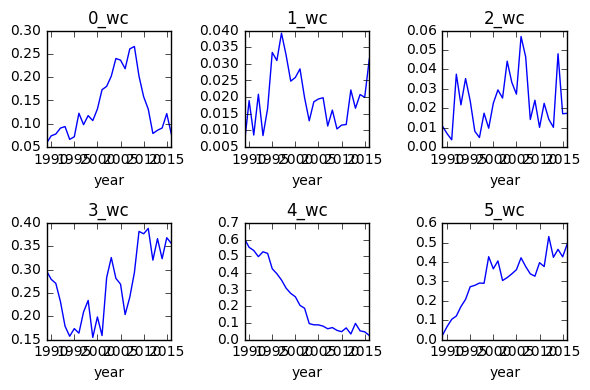

In [52]:
grouped_year = df_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year[e].sum()/grouped_year['word_count'].sum()).plot(kind='line', title=e)
    
fig3.tight_layout()
plt.show()

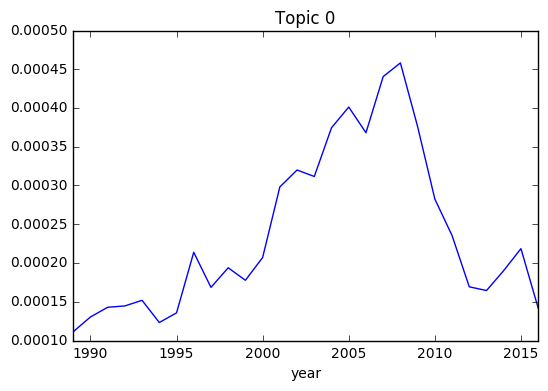

In [55]:
grouped_year = df_w_topics.groupby('year')
fig4 = plt.figure()
(grouped_year[0].sum()/grouped_year['word_count'].sum()).plot(kind='line', title="Topic 0")
fig3.tight_layout()
plt.show()

### Topics by gender
Here we find topics in the gender catagories. 


In [33]:
female_tracks = df[df['artist_gender'] == 'Female']


female_tracks

,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree
3,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","['You', 'can', 'chachacha', 'to', 'this', 'Mar...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'..."
21,23,I Think I Can Beat Mike T.,D.J. Jazzy Jeff & The Fresh Prince,Female,1989-11-04,1989,\n\n[Intro: Prince and >>Jeff imitate two old ...,\n\n\nHey...hey Leroy...Leroy\n>>Yeah\nDid you...,"['Hey', '...', 'hey', 'Leroy', '...', 'Leroy',...","['Hey', 'hey', 'Leroy', 'Leroy', 'Yeah', 'Did'...","['hey', 'hey', 'leroy', 'leroy', 'yeah', 'did'...","['hey', 'hey', 'leroy', 'leroy', 'yeah', 'hear..."
25,39,Expression,Salt-N-Pepa,Female,1989-12-16,1989,"\n\nOh yeah, oh yeah\nYou know life is all abo...","\n\nOh yeah, oh yeah\nYou know life is all abo...","['Oh', 'yeah', ',', 'oh', 'yeah', 'You', 'know...","['Oh', 'yeah', 'oh', 'yeah', 'You', 'know', 'l...","['oh', 'yeah', 'oh', 'yeah', 'you', 'know', 'l...","['oh', 'yeah', 'oh', 'yeah', 'know', 'life', '..."
29,48,Ladies First,Queen Latifah Featuring Monie Love,Female,1990-01-20,1990,"\n\n[Queen Latifah]\nThe ladies will kick it, ...","\n\n\nThe ladies will kick it, the rhyme that ...","['The', 'ladies', 'will', 'kick', 'it', ',', '...","['The', 'ladies', 'will', 'kick', 'it', 'the',...","['the', 'ladies', 'will', 'kick', 'it', 'the',...","['ladies', 'kick', 'rhyme', 'wicked', 'dont', ..."
31,50,The Humpty Dance,Digital Underground,Female,1990-02-03,1990,\n\n[Verse One: Shock G as Humpty Hump]\nAll r...,"\n\n\nAll right! Stop whatcha doin, cause Im a...","['All', 'right', '!', 'Stop', 'whatcha', 'doin...","['All', 'right', 'Stop', 'whatcha', 'doin', 'c...","['all', 'right', 'stop', 'whatcha', 'doin', 'c...","['right', 'stop', 'whatcha', 'doin', 'cause', ..."
41,67,"Stop, Look, Listen",MC Lyte & DJ K Rock,Female,1990-03-17,1990,"\n\n[ VERSE 1 ]\nI'm rhymin and designin, also...","\n\n\nIm rhymin and designin, also creatin\nTh...","['Im', 'rhymin', 'and', 'designin', ',', 'also...","['Im', 'rhymin', 'and', 'designin', 'also', 'c...","['im', 'rhymin', 'and', 'designin', 'also', 'c...","['im', 'rhymin', 'designin', 'also', 'creatin'..."
53,85,Come Into My House,Queen Latifah,Female,1990-05-05,1990,\n\n[Verse 1:]\nWelcome into my Queendom (My Q...,\n\n\nWelcome into my Queendom (My Queendom)\n...,"['Welcome', 'into', 'my', 'Queendom', '(', 'My...","['Welcome', 'into', 'my', 'Queendom', 'My', 'Q...","['welcome', 'into', 'my', 'queendom', 'my', 'q...","['welcome', 'queendom', 'queendom', 'come', 'o..."
58,94,Fame 90,David Bowie With Queen Latifah,Female,1990-06-02,1990,"\n\nFame, makes a man take things over\nFame, ...","\n\nFame, makes a man take things over\nFame, ...","['Fame', ',', 'makes', 'a', 'man', 'take', 'th...","['Fame', 'makes', 'a', 'man', 'take', 'things'...","['fame', 'makes', 'a', 'man', 'take', 'things'...","['fame', 'makes', 'man', 'take', 'things', 'fa..."
78,119,Doowutchyalike,Digital Underground,Female,1990-08-11,1990,"\n\n[Hook]\nOoh, I see guys and girls dancing,...","\n\n\nOoh, I see guys and girls dancing, ooh, ...","['Ooh', ',', 'I', 'see', 'guys', 'and', 'girls...","['Ooh', 'I', 'see', 'guys', 'and', 'girls', 'd...","['ooh', 'i', 'see', 'guys', 'and', 'girls', 'd...","['ooh', 'see', 'guys', 'girls', 'dancing', 'oo..."
88,133,Cappucino,MC Lyte,Female,1990-09-22,1990,\n\nIt was a cafe? It was a cafe on the west s...,\n\nIt was a cafe? It was a cafe on the west s...,"['It', 'was', 'a', 'cafe', '?', 'It', 'was', '...","['It', 'was', 'a', 'cafe', 'It', 'was', 'a', '...","['it', 'was', 'a', 'cafe', 'it', 'was', 'a', '...","['cafe', 'cafe', 'west', 'side', 'cafe', 'cafe..."


In [34]:
print("Extracting tf features for LDA...")
vectorizer_female = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english'
                                )

dtm_female = vectorizer_female.fit_transform(female_tracks.lyrics_clean)

Extracting tf features for LDA...


In [35]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (225, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda2 = LatentDirichletAllocation(n_topics=3, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=225,
                                random_state=0)
#fit the model
lda2.fit(dtm_female)

Fitting LDA models with tf features, n_samples=2317 and n_topics=6...


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=80.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_jobs=1, n_topics=3, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=225, verbose=0)

In [36]:
print("\nTopics in LDA model:")
dtm_female_feature_names = vectorizer_female.get_feature_names()
print_top_words(lda2, dtm_female_feature_names, 50)


Topics in LDA model:

Topic #0:
aint baby make just wanna ass cause em money want yeah let say need bitches shit bitch time look mind new tell fuck night gonna thats love life bout come ya imma nigga right stop oh gotta head hit gon man better ill big bad think feel way girl game

Topic #1:
love girl way man good yeah just oh ill youre say cause girls lets bad right uh aint time thats come look said feel think baby wanna day tell yo make let need thing gotta hit boy really fly little hear want night better world gonna pop stop ya real

Topic #2:
ya niggas nigga shit yo uh yall bitch thats fuck come just right cause yeah bitches love em aint let real ass man play make say want wanna gotta tell time oh ride hit look youre pop baby gon stop try money run ill hear think new hold big gonna

